<a href="https://colab.research.google.com/github/LukeHolmessba23038/Data-Preparation/blob/main/Machine_Learning_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded Pandas, mounted csv file via drive. printed head


# New Section

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv'

import pandas as pd
data_1 = pd.read_csv(file_path)

print(data_1.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
1  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
2  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
3  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   
4  09/24/2023  01/01/2020  09/23/2023  By Total   NaN    NaN  United States   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18     25-34   
2  Respiratory diseases  Influenza and pneumonia     J09-J18     35-44   
3  Respiratory diseases  Influenza and pneumonia     J09-J18     45-54   
4  Respiratory diseases  I

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Gathered basic statistical and descriptive information

In [ ]:
data_1_shape = data_1.shape

# Descriptive statistics for all columns
data_1_describe = data_1.describe(include='all')

# Display the last few rows of the DataFrame
data_1_tail = data_1.tail()

# Display the data types of each column
data_1_dtypes = data_1.dtypes

data_1_shape, data_1_describe, data_1_tail, data_1_dtypes

((621000, 14),
         Data As Of  Start Date    End Date     Group           Year  \
 count       621000      621000      621000    621000  608580.000000   
 unique           1          45          45         3            NaN   
 top     09/24/2023  01/01/2020  09/23/2023  By Month            NaN   
 freq        621000       37260       37260    558900            NaN   
 mean           NaN         NaN         NaN       NaN    2021.408163   
 std            NaN         NaN         NaN       NaN       1.086436   
 min            NaN         NaN         NaN       NaN    2020.000000   
 25%            NaN         NaN         NaN       NaN    2020.000000   
 50%            NaN         NaN         NaN       NaN    2021.000000   
 75%            NaN         NaN         NaN       NaN    2022.000000   
 max            NaN         NaN         NaN       NaN    2023.000000   
 
                 Month          State       Condition Group  \
 count   558900.000000         621000                621

In [ ]:
data_1 = pd.DataFrame(data_1)

data_1['Data As Of'] = pd.to_datetime(data_1['Data As Of'])
data_1['Start Date'] = pd.to_datetime(data_1['Start Date'])
data_1 ['End Date'] = pd.to_datetime(data_1['End Date'])

print(data_1)


       Data As Of Start Date   End Date     Group    Year  Month  \
0      2023-09-24 2020-01-01 2023-09-23  By Total     NaN    NaN   
1      2023-09-24 2020-01-01 2023-09-23  By Total     NaN    NaN   
2      2023-09-24 2020-01-01 2023-09-23  By Total     NaN    NaN   
3      2023-09-24 2020-01-01 2023-09-23  By Total     NaN    NaN   
4      2023-09-24 2020-01-01 2023-09-23  By Total     NaN    NaN   
...           ...        ...        ...       ...     ...    ...   
620995 2023-09-24 2023-05-01 2023-05-31  By Month  2023.0    5.0   
620996 2023-09-24 2023-06-01 2023-06-30  By Month  2023.0    6.0   
620997 2023-09-24 2023-07-01 2023-07-31  By Month  2023.0    7.0   
620998 2023-09-24 2023-08-01 2023-08-31  By Month  2023.0    8.0   
620999 2023-09-24 2023-09-01 2023-09-23  By Month  2023.0    9.0   

                State       Condition Group                Condition  \
0       United States  Respiratory diseases  Influenza and pneumonia   
1       United States  Respiratory dise

Some Charting Below as Part of EDA

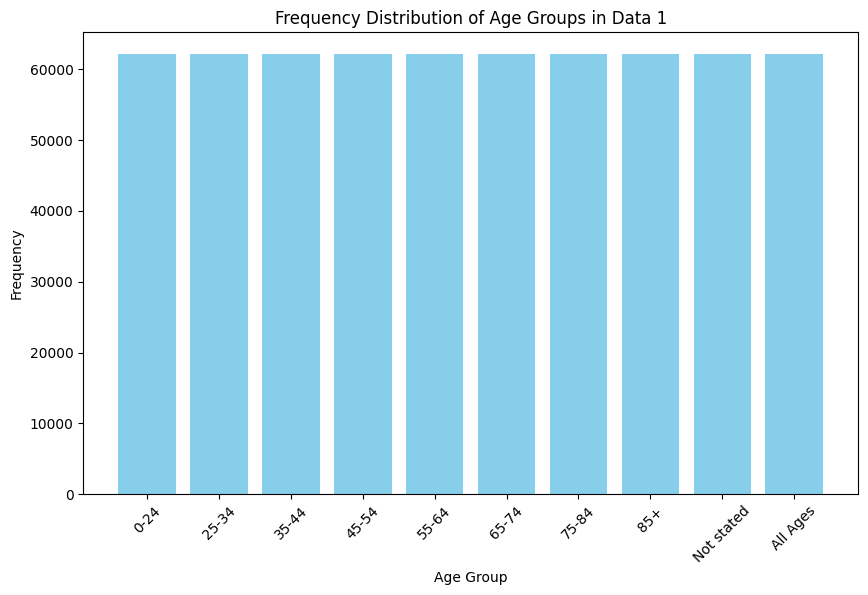

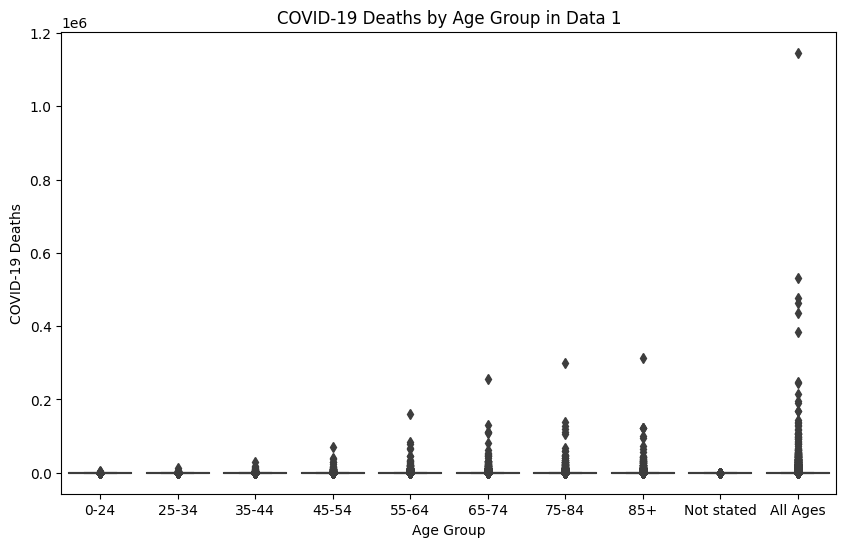

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

age_group_counts_data_1 = data_1['Age Group'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(age_group_counts_data_1.index, age_group_counts_data_1.values, color='skyblue')
plt.title('Frequency Distribution of Age Groups in Data 1')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels to show clearly
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='COVID-19 Deaths', data=data_1)
plt.title('COVID-19 Deaths by Age Group in Data 1')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.show()

Covid19 Deaths by Condition and Age Group

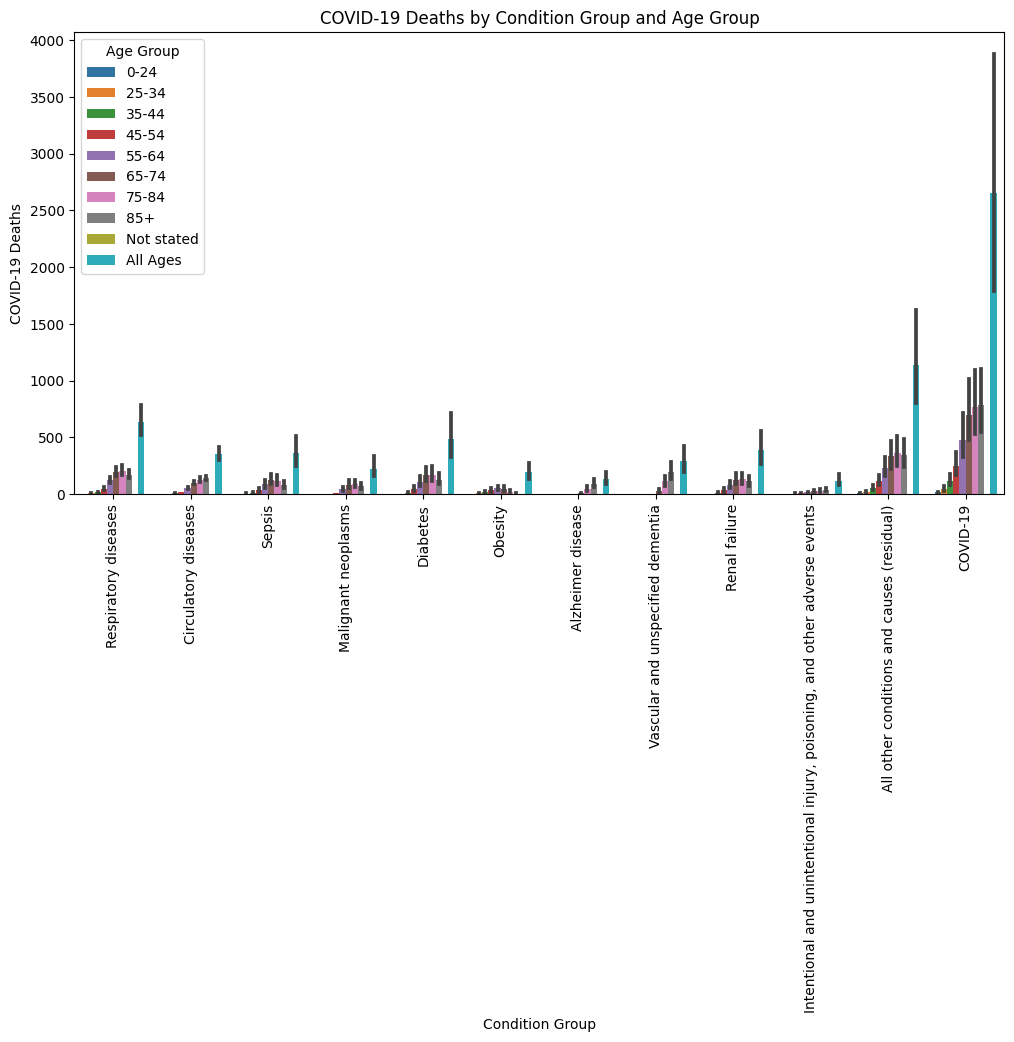

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
barplot1 = sns.barplot(x='Condition Group', y='COVID-19 Deaths', hue='Age Group', data=data_1)
plt.title('COVID-19 Deaths by Condition Group and Age Group')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Deaths')
plt.legend(title='Age Group')
barplot1.set_xticklabels(barplot1.get_xticklabels(), rotation=90)  # Rotate x-axis labels
plt.show()



# MAde a unique States data set and removed 'United States' as it was being included in the group of states and was badly skewing the data. Fixed graph is below.

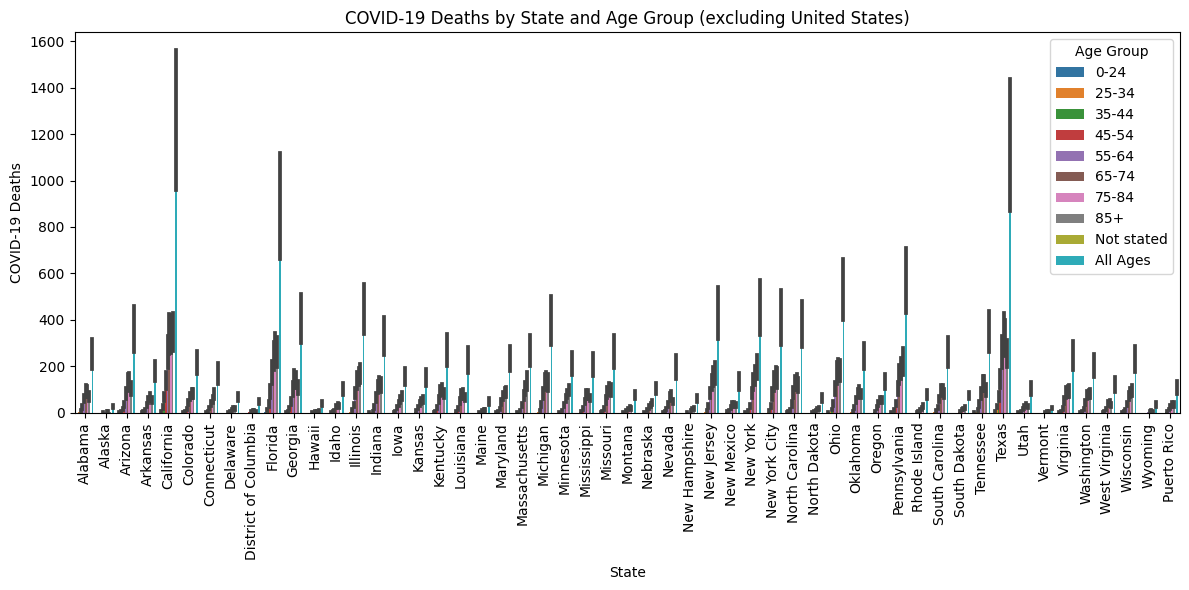

In [ ]:

unique_states = data_1['State'].unique()


data_1_no_us = data_1[data_1['State'] != 'United States']

plt.figure(figsize=(12, 6))
barplot_no_us = sns.barplot(x='State', y='COVID-19 Deaths', hue='Age Group', data=data_1_no_us)
plt.title('COVID-19 Deaths by State and Age Group (excluding United States)')
plt.xlabel('State')
plt.ylabel('COVID-19 Deaths')
plt.legend(title='Age Group')
barplot_no_us.set_xticklabels(barplot_no_us.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


Checked for N/a as part pof preprocessing for ML models

In [ ]:
missing_values_count = data_1_no_us.isnull().sum()
print(missing_values_count)



Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12190
Month                  60950
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  426051
dtype: int64


There were quite aq few N/a and bad data, which I deleted.

In [ ]:
data_1_cleaned = data_1.dropna(subset=['COVID-19 Deaths', 'Number of Mentions'])


Checked to see how much of the data was removed above

In [ ]:
original_row_count = data_1.shape[0]
cleaned_row_count = data_1_cleaned.shape[0]
rows_dropped = original_row_count - cleaned_row_count

print(f"Original number of rows: {original_row_count}")
print(f"Number of rows after cleaning: {cleaned_row_count}")
print(f"Number of rows dropped: {rows_dropped}")


Original number of rows: 621000
Number of rows after cleaning: 437551
Number of rows dropped: 183449


While running the ML models below, I had issues with categorical columns (this data is mostly categorical) below, I hot-encoded it to make it numerical.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


date_cols = ['Data As Of', 'Start Date', 'End Date', 'Year', 'Month']
data_1_cleaned = data_1_cleaned.drop(columns=date_cols)

categorical_cols = data_1_cleaned.select_dtypes(include=['object', 'category']).columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_1_encoded = pd.DataFrame(encoder.fit_transform(data_1_cleaned[categorical_cols]))

data_1_encoded.columns = encoder.get_feature_names_out(categorical_cols)

data_1_encoded.index = data_1_cleaned.index

num_data_1_cleaned = data_1_cleaned.drop(categorical_cols, axis=1)
data_1_preprocessed = pd.concat([num_data_1_cleaned, data_1_encoded], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import OneHotEncoder

date_cols = ['Data As Of', 'Start Date', 'End Date', 'Year', 'Month']
data_1_cleaned = data_1_cleaned.drop(columns=date_cols, errors='ignore')


categorical_cols = data_1_cleaned.select_dtypes(include=['object', 'category']).columns

# Applying One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_1_encoded = pd.DataFrame(encoder.fit_transform(data_1_cleaned[categorical_cols]))

data_1_encoded.index = data_1_cleaned.index

num_data_1_cleaned = data_1_cleaned.drop(categorical_cols, axis=1)
data_1_preprocessed = pd.concat([num_data_1_cleaned, data_1_encoded], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The first Model - SKLearn Train, Test, Split

In [ ]:
from sklearn.model_selection import train_test_split

# 'COVID-19 Deaths' is the target variable
y = data_1_preprocessed['COVID-19 Deaths']
X = data_1_preprocessed.drop('COVID-19 Deaths', axis=1)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")


Training set size: 350040 rows
Testing set size: 87511 rows


Just viewing my pre-processed data to see what it looks like

In [ ]:
data_1_preprocessed.head()

,COVID-19 Deaths,Number of Mentions,0,1,2,3,4,5,6,7,...,116,117,118,119,120,121,122,123,124,125
0,1569.0,1647.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5804.0,6029.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,15080.0,15699.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37414.0,38878.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,82668.0,85708.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


checking dtypes for later ML models

In [ ]:
print(X_train.dtypes)


Number of Mentions    float64
0                     float64
1                     float64
2                     float64
3                     float64
                       ...   
121                   float64
122                   float64
123                   float64
124                   float64
125                   float64
Length: 127, dtype: object


Train/Test Split View

In [ ]:
print(X_train.columns)
print(X_test.columns)



Index(['Number of Mentions',                    0,                    1,
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,
       ...
                        116,                  117,                  118,
                        119,                  120,                  121,
                        122,                  123,                  124,
                        125],
      dtype='object', length=127)
Index(['Number of Mentions',                    0,                    1,
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,
       ...
                        116,                  117,                  118,
                        119,                  120,                  121,
                        122,                  123,   

In [ ]:
print(X_train.dtypes)


Number of Mentions    float64
0                     float64
1                     float64
2                     float64
3                     float64
                       ...   
121                   float64
122                   float64
123                   float64
124                   float64
125                   float64
Length: 127, dtype: object


In [ ]:
# Check for missing values
print(X_train.isnull().sum())

# Check data types
print(X_train.dtypes)


Number of Mentions    0
0                     0
1                     0
2                     0
3                     0
                     ..
121                   0
122                   0
123                   0
124                   0
125                   0
Length: 127, dtype: int64
Number of Mentions    float64
0                     float64
1                     float64
2                     float64
3                     float64
                       ...   
121                   float64
122                   float64
123                   float64
124                   float64
125                   float64
Length: 127, dtype: object


Converted all types to str for ML modelling below

In [ ]:
# Convert all column names to strings
X.columns = X.columns.astype(str)


In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


Training Linear Regression Model on the dataset


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Checking Linear Regression Model Metrics

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 119573.1576029768
R^2 Score: 0.9530692937008057


In [ ]:
coefficients = model.coef_


Training Columns and Feature Importance

In [ ]:
feature_names = X_train.columns
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])


Graphing Feature Importance


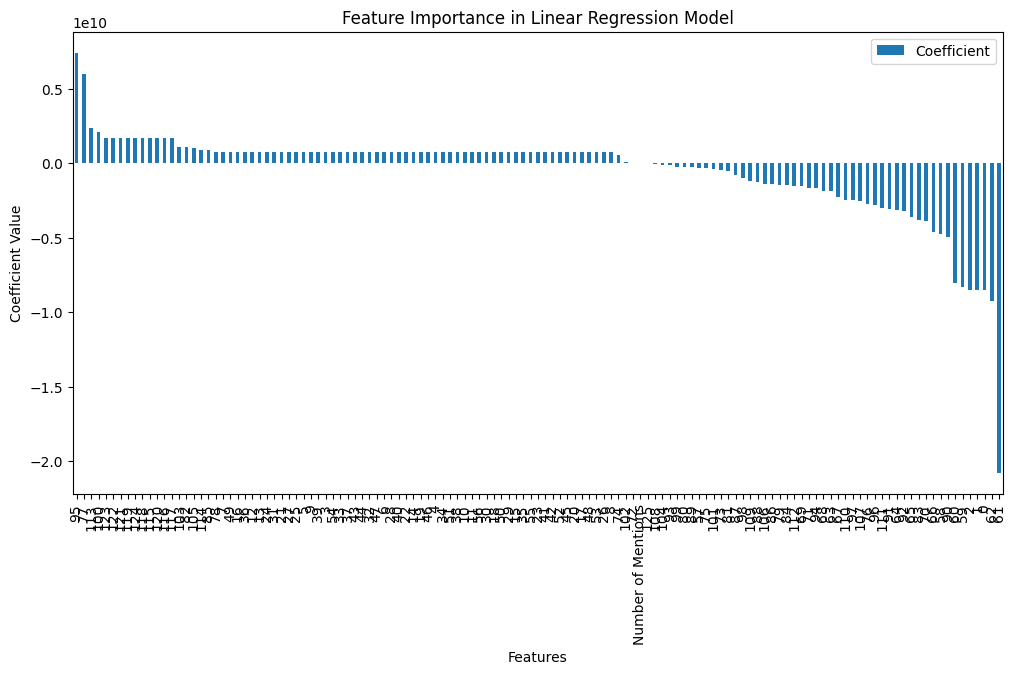

In [ ]:
import matplotlib.pyplot as plt

feature_importance.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance in Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()


Running Standard Scaler to fix the data before fruther training

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training and gathering metrics on Linear Regression Model. Below is the same as above but with the scaled data so it is easy to visualise

In [ ]:

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred_scaled = model.predict(X_test_scaled)


mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"Mean Squared Error: {mse_scaled}")


r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R^2 Score: {r2_scaled}")


Mean Squared Error: 119530.27704932197
R^2 Score: 0.9530861236876511


In [ ]:
coefficients = model.coef_


In [ ]:
feature_names = X_train.columns
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])


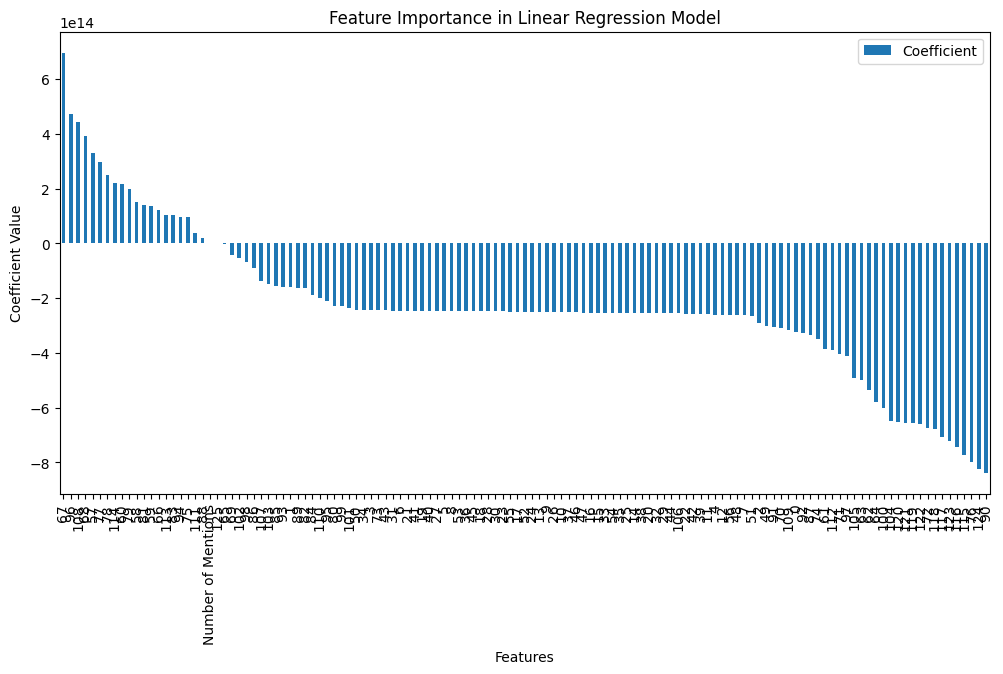

In [ ]:
feature_importance.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance in Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()


In [ ]:
coefficients = model.coef_

feature_names = X_train.columns
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])


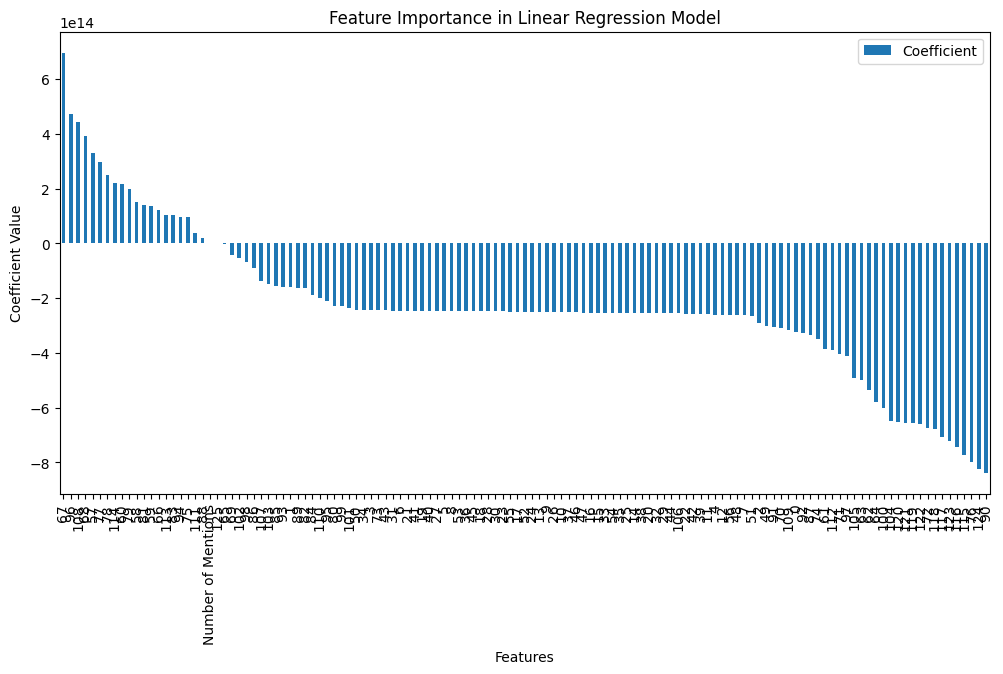

In [ ]:
sorted_features = feature_importance.sort_values(by='Coefficient', ascending=False)

sorted_features.plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance in Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.show()


Viewing Feature Importance Data

In [ ]:
coefficients = model.coef_

feature_names = X_train.columns
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

print(feature_importance)


                     Coefficient
Number of Mentions  3.193643e+03
0                  -3.228707e+14
1                  -1.584457e+14
2                  -2.892308e+14
3                  -2.441330e+14
...                          ...
121                -6.542653e+14
122                -6.586453e+14
123                -7.226933e+14
124                -8.236515e+14
125                 0.000000e+00

[127 rows x 1 columns]


In [ ]:
# Number of rows to display at a time
chunk_size = 10

# Iterate over the DataFrame in chunks
for start in range(0, len(feature_importance), chunk_size):
    end = start + chunk_size
    print(feature_importance.iloc[start:end])
    print("\n")  # Print a newline for better separation between chunks


                     Coefficient
Number of Mentions  3.193643e+03
0                  -3.228707e+14
1                  -1.584457e+14
2                  -2.892308e+14
3                  -2.441330e+14
4                  -2.605345e+14
5                  -2.471668e+14
6                  -2.453000e+14
7                  -2.624680e+14
8                  -2.473037e+14


     Coefficient
9  -2.503349e+14
10 -2.508170e+14
11 -2.583988e+14
12 -2.614571e+14
13 -2.499485e+14
14 -2.540121e+14
15 -2.525443e+14
16 -2.523530e+14
17 -2.497357e+14
18 -2.481822e+14


     Coefficient
19 -2.465004e+14
20 -2.544298e+14
21 -2.459108e+14
22 -2.563755e+14
23 -2.485521e+14
24 -2.499291e+14
25 -2.539170e+14
26 -2.504892e+14
27 -2.471276e+14
28 -2.482990e+14


     Coefficient
29 -2.551684e+14
30 -2.484353e+14
31 -2.449841e+14
32 -2.551495e+14
33 -2.527545e+14
34 -2.426008e+14
35 -2.530982e+14
36 -2.476750e+14
37 -2.518932e+14
38 -2.543539e+14


     Coefficient
39 -2.578759e+14
40 -2.469122e+14
41 -2.459305e+14


Running Lasso ML Model and Running Metrics

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
lasso_model = Lasso(alpha=1.0)


In [ ]:
lasso_model.fit(X_train, y_train)


Lasso()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 119629.68971020046
R^2 Score: 0.9530471056799006


In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 119629.68971020046
R^2 Score: 0.9530471056799006


Calculating Metrics

In [ ]:
from sklearn import metrics
import numpy as np


rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Root Mean Squared Error (RMSE): 345.8752516590345
Mean Absolute Error (MAE): 18.54945519148683


Running Residual Plot

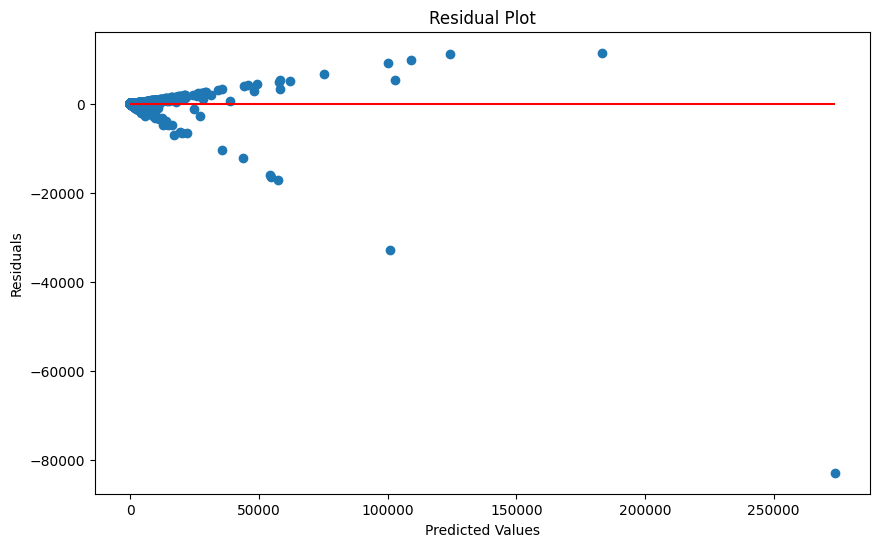

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
Running Cross Val Score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(-scores)

print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())


Cross-validated RMSE scores: [1094.62584254   41.30816971   36.25026322   36.84615      41.14088855]
Mean RMSE: 250.03426280424463


Running KFold ML Model

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

folds = list(kf.split(X))

train_indices, test_indices = folds[0]


In [ ]:
X_fold1, y_fold1 = X.iloc[test_indices], y.iloc[test_indices]


print(X_fold1.describe())
print(y_fold1.describe())

print(X.describe())
print(y.describe())


       Number of Mentions             0             1             2  \
count        87511.000000  87511.000000  87511.000000  87511.000000   
mean           115.520952      0.888700      0.023951      0.087349   
std           1855.304203      0.314505      0.152898      0.282347   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      1.000000      0.000000      0.000000   
50%              0.000000      1.000000      0.000000      0.000000   
75%             19.000000      1.000000      0.000000      0.000000   
max         298663.000000      1.000000      1.000000      1.000000   

                  3             4             5             6             7  \
count  87511.000000  87511.000000  87511.000000  87511.000000  87511.000000   
mean       0.017643      0.020249      0.017609      0.018386      0.020455   
std        0.131653      0.140851      0.131527      0.134344      0.141550   
min        0.000000      0.000000      0.000

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - Mean Squared Error: {rf_mse}")
print(f"Random Forest - R^2 Score: {rf_r2}")


Random Forest - Mean Squared Error: 230110.6785765412
Random Forest - R^2 Score: 0.9096849419295162


Gradient Boosting

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


xgb_model = XGBRegressor(random_state=42)


xgb_model.fit(X_train, y_train)


xgb_predictions = xgb_model.predict(X_test)


xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost - Mean Squared Error: {xgb_mse}")
print(f"XGBoost - R^2 Score: {xgb_r2}")


XGBoost - Mean Squared Error: 1435663.2412159576
XGBoost - R^2 Score: 0.4365232860892677


Ridge Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


data_1_preprocessed.columns = data_1_preprocessed.columns.astype(str)

# Sample 3% of the data
sampled_data = data_1_preprocessed.sample(frac=0.03, random_state=42)

# Split the Sample
X_sample = sampled_data.drop('COVID-19 Deaths', axis=1)
y_sample = sampled_data['COVID-19 Deaths']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_sample, y_train_sample)


ridge_predictions = ridge_model.predict(X_test_sample)
ridge_mse = mean_squared_error(y_test_sample, ridge_predictions)
ridge_r2 = r2_score(y_test_sample, ridge_predictions)

print(f"Ridge Regression - Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression - R^2 Score: {ridge_r2}")




Ridge Regression - Mean Squared Error: 69549.19693577621
Ridge Regression - R^2 Score: 0.8998919383066677


SVR Model (on 3% of the data as 100% was taking hours to process

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

sampled_data = data_1_preprocessed.sample(frac=0.03, random_state=42)

X_sample = sampled_data.drop('COVID-19 Deaths', axis=1)
y_sample = sampled_data['COVID-19 Deaths']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

svr_model = SVR()
svr_model.fit(X_train_sample, y_train_sample)

y_pred_sample = svr_model.predict(X_test_sample)
mse = mean_squared_error(y_test_sample, y_pred_sample)
r2 = r2_score(y_test_sample, y_pred_sample)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Mean Squared Error: 684977.500927637
R^2 Score: 0.014053749826476558


Running Ridge Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Sample 3% of the data
sampled_data = data_1_preprocessed.sample(frac=0.03, random_state=42)

# Split the Sample
X_sample = sampled_data.drop('COVID-19 Deaths', axis=1)
y_sample = sampled_data['COVID-19 Deaths']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_sample, y_train_sample)


ridge_predictions = ridge_model.predict(X_test_sample)
ridge_mse = mean_squared_error(y_test_sample, ridge_predictions)
ridge_r2 = r2_score(y_test_sample, ridge_predictions)

print(f"Ridge Regression - Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression - R^2 Score: {ridge_r2}")


Ridge Regression - Mean Squared Error: 69549.19693577621
Ridge Regression - R^2 Score: 0.8998919383066677
